# 🏠 Energy Efficiency Prediction using Machine Learning

---

## 🧩 Problem Overview

In the current era of climate consciousness and sustainable development, optimizing energy consumption in buildings has become a critical concern for architects, engineers, and urban planners. Buildings account for a substantial portion of global energy usage, with heating and cooling loads being significant contributors.

This project focuses on predicting a building’s **Heating Load** using various architectural parameters. Accurate prediction enables the development of energy-efficient building designs during the early planning stages, reducing long-term energy consumption and environmental impact.

---

## 🎯 Objective

The primary objective of this project is to:

- **Build a machine learning model** that accurately predicts the **Heating Load (Y1)** of buildings using a set of 8 architectural and design-related input features.
- **Evaluate multiple regression algorithms** and choose the most effective one based on performance metrics.
- **Optimize the selected model** using hyperparameter tuning for improved accuracy and generalization.
- **Interpret the influence of design factors** on energy efficiency, aiding energy-conscious decision-making.

---

## 📂 Data Description

- **Dataset Source**: [UCI Machine Learning Repository – Energy Efficiency Dataset](https://archive.ics.uci.edu/dataset/242/energy+efficiency)
- **Number of Samples**: 768  
- **Number of Features**: 8  
- **Target Variables**:  
  - **Y1** – Heating Load (focus of this project)  
  - **Y2** – Cooling Load (not modeled here)

The dataset consists of simulated data based on a consistent building geometry while varying certain architectural design parameters.

---

## 🧾 Feature Information

| Feature Name                   | Code | Description |
|-------------------------------|------|-------------|
| **Relative Compactness**      | X1   | Ratio of building volume to its surface area. More compact buildings lose less heat, improving efficiency. |
| **Surface Area**              | X2   | Total external surface area (walls + roof + ground) in square meters. Higher area may lead to more heat exchange. |
| **Wall Area**                 | X3   | Area of external walls in square meters. |
| **Roof Area**                 | X4   | Area of the roof in square meters. |
| **Overall Height**            | X5   | Height of the building (e.g., single or multi-story). Higher buildings may affect internal heat retention. |
| **Orientation**               | X6   | Cardinal orientation of the building (encoded as integers 2 to 5). Impacts solar gain and ventilation. |
| **Glazing Area**              | X7   | Percentage of window area relative to wall area (0 to 0.4). More glazing can influence heat transfer and lighting. |
| **Glazing Area Distribution** | X8   | Direction of window placement (0: none, 1–5: various directions). Affects solar heat gain and loss. |

---



In [92]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [93]:
data= pd.read_csv("energy.csv")
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [94]:
df=pd.DataFrame(data)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Descriptive statistics

In [95]:
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [96]:
df.tail(2)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [97]:
df.shape

(768, 10)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [99]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## checking for null , nan and duplicate values

In [100]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [101]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [102]:
df.duplicated().sum()

np.int64(0)

# Renaming columns for better understanding`

In [103]:
# Rename columns
df.columns = [
    'Relative_Compactness',       # X1
    'Surface_Area',               # X2
    'Wall_Area',                  # X3
    'Roof_Area',                  # X4
    'Overall_Height',             # X5
    'Orientation',                # X6 (categorical)
    'Glazing_Area',               # X7 (window area)
    'Glazing_Area_Distribution', # X8 (categorical orientation of glazing)
    'Heating_Load',               # Y1 (target)
    'Cooling_Load'                # Y2 (target)
]

# Check result
df.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Distribution of Target Variables


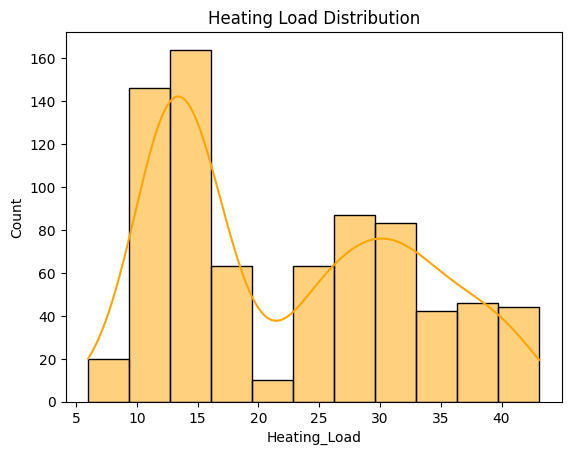

In [104]:
# Heating Load
sns.histplot(df['Heating_Load'], kde=True, color='orange')  
plt.title("Heating Load Distribution")
plt.show()

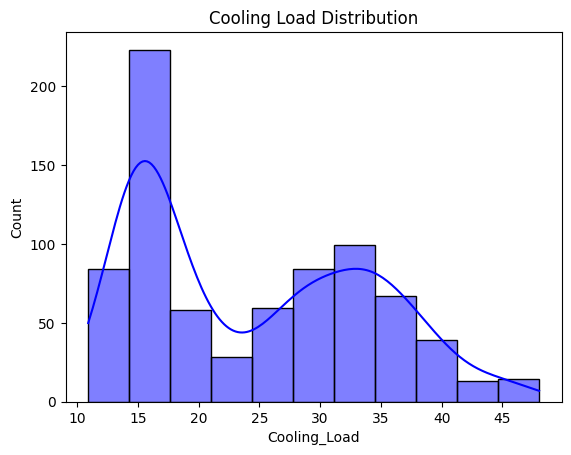

In [105]:
# Cooling Load
sns.histplot(df['Cooling_Load'], kde=True, color='blue')
plt.title("Cooling Load Distribution")
plt.show()

## Pairplot of Select Features

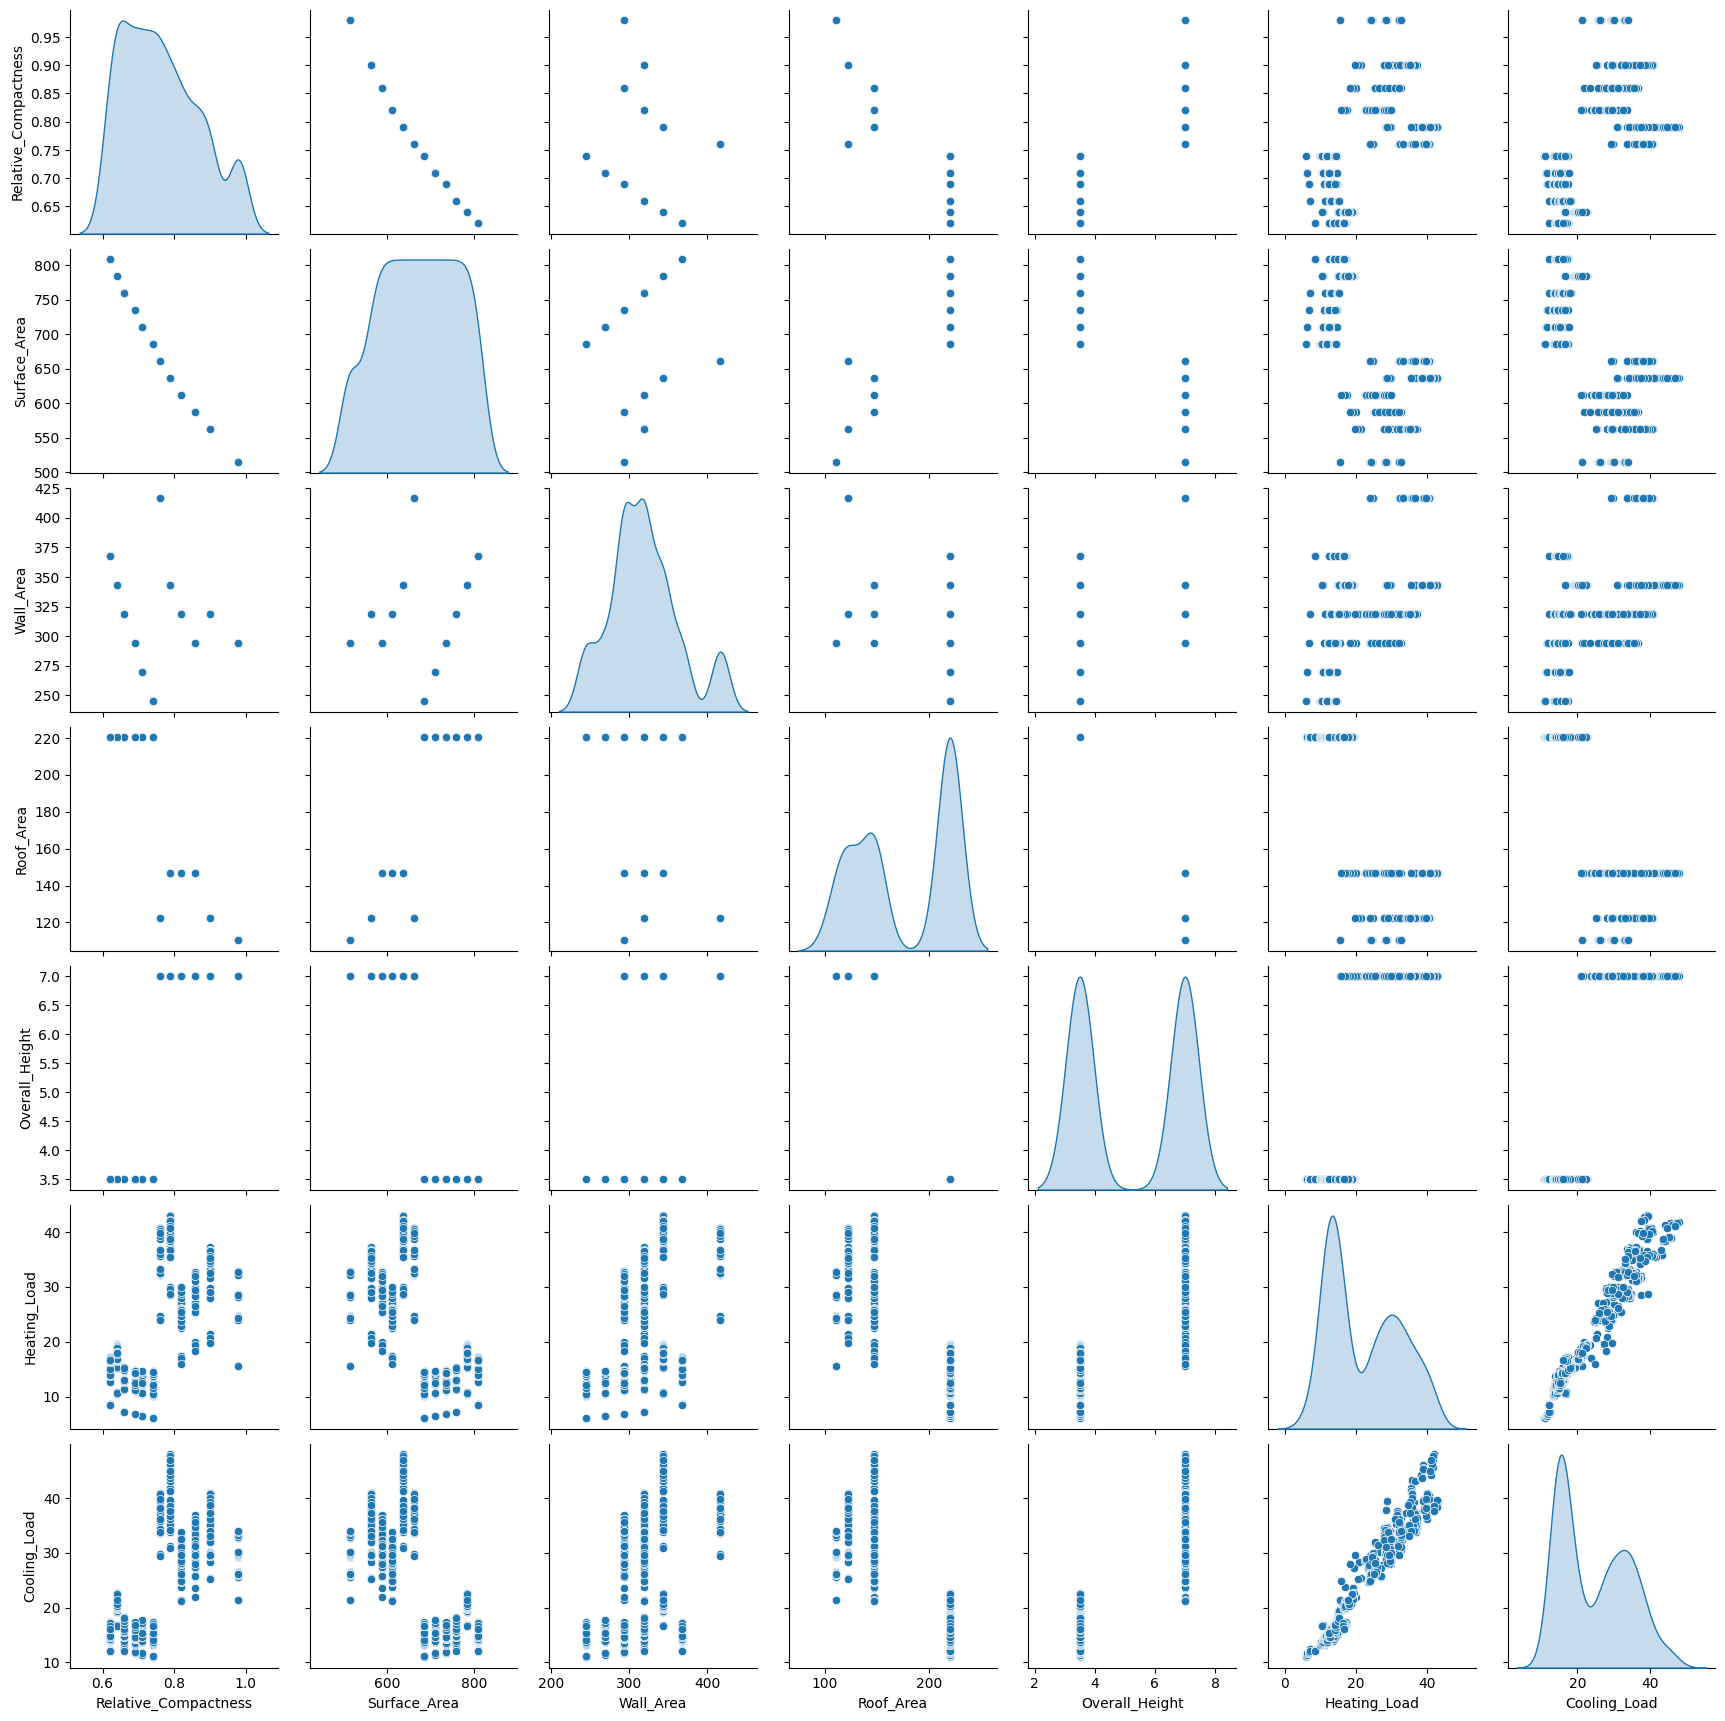

In [106]:
sns.pairplot(df[['Relative_Compactness', 'Surface_Area', 'Wall_Area',
                 'Roof_Area', 'Overall_Height', 'Heating_Load', 'Cooling_Load']],
             diag_kind='kde')


## Scatterplots – Key Relationships


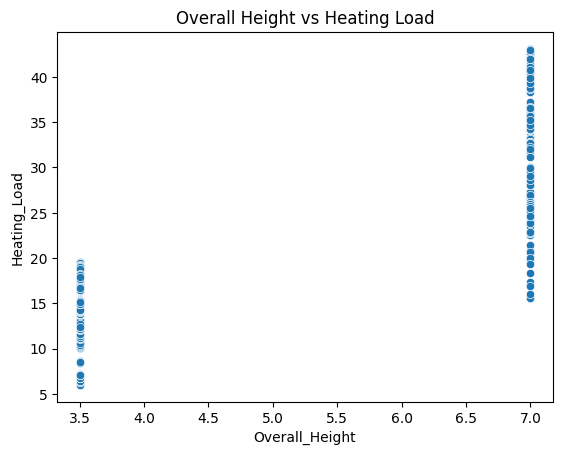

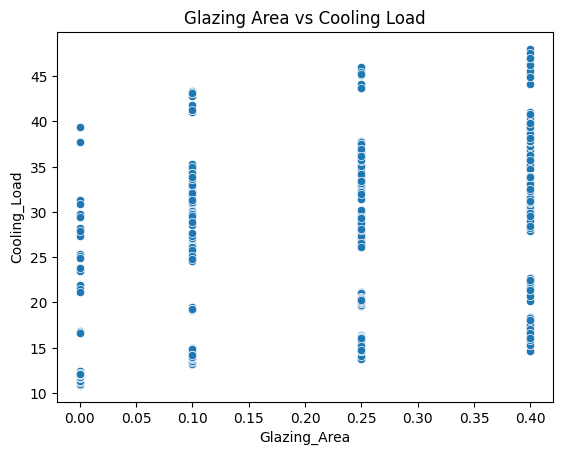

In [107]:
# Overall Height vs Heating Load
sns.scatterplot(x='Overall_Height', y='Heating_Load', data=df)
plt.title("Overall Height vs Heating Load")
plt.show()

# Glazing Area vs Cooling Load
sns.scatterplot(x='Glazing_Area', y='Cooling_Load', data=df)
plt.title("Glazing Area vs Cooling Load")
plt.show()


## Boxplots – Impact of Categorical Features


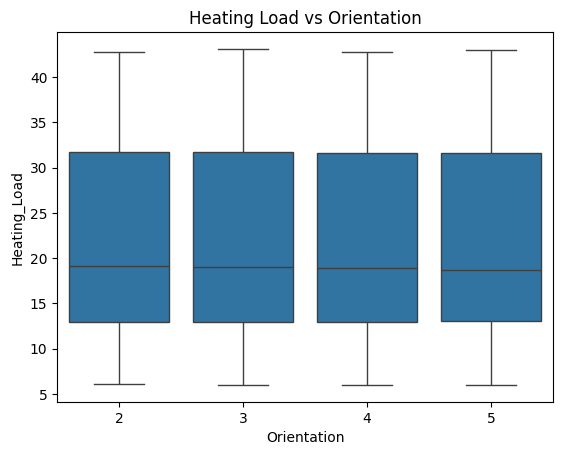

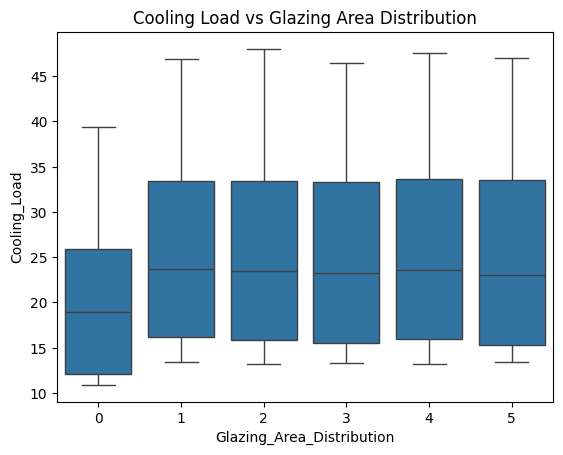

In [108]:
# Orientation vs Heating Load
sns.boxplot(x='Orientation', y='Heating_Load', data=df)
plt.title("Heating Load vs Orientation")
plt.show()

# Glazing Area Distribution vs Cooling Load
sns.boxplot(x='Glazing_Area_Distribution', y='Cooling_Load', data=df)
plt.title("Cooling Load vs Glazing Area Distribution")
plt.show()


## Correlation Heatmap

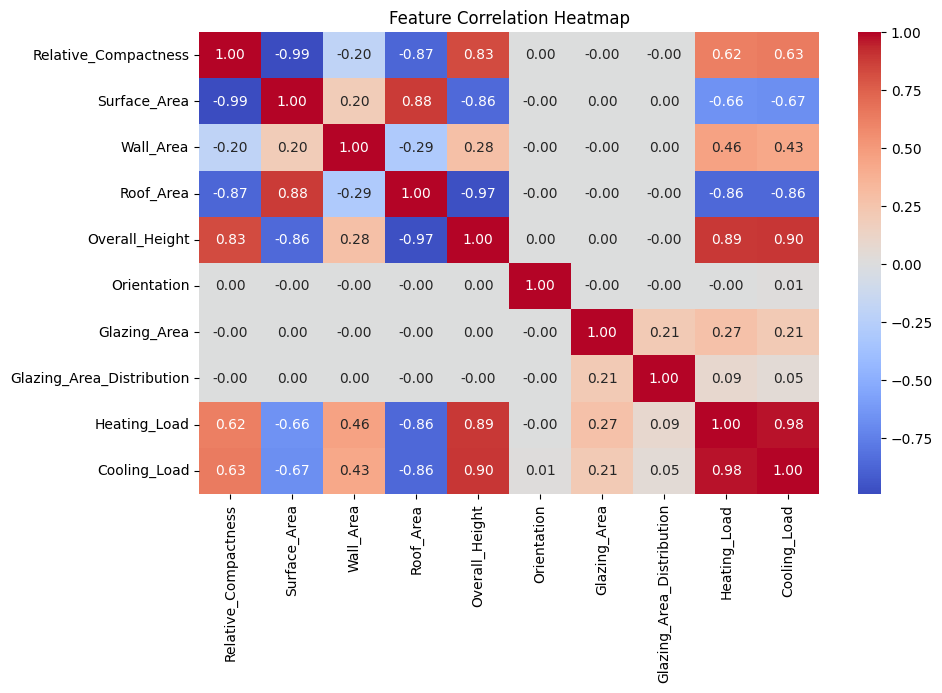

In [109]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Observations & Insights
- Buildings with higher relative compactness tend to have lower heating and cooling loads.
- Overall height has a significant impact on both heating and cooling requirements.
- Orientation and glazing distribution influence energy loads, but the effect is less pronounced than structural dimensions.
- Heating and cooling loads are very similar in trend and are highly correlated.

## Plotting boxplot to check for outliers

<Axes: >

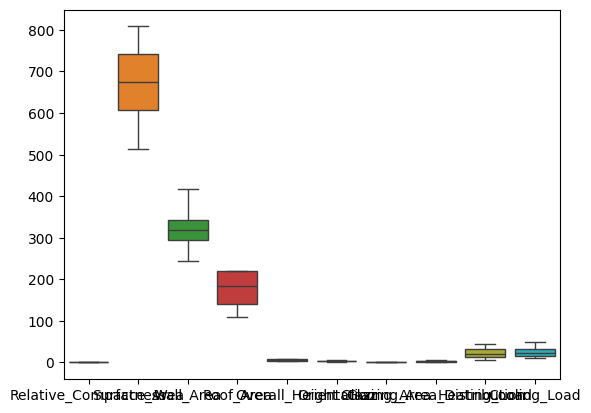

In [110]:
sns.boxplot(data=df)

## Correlation Analysis

In [111]:
co=df.corr()
co

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<Axes: >

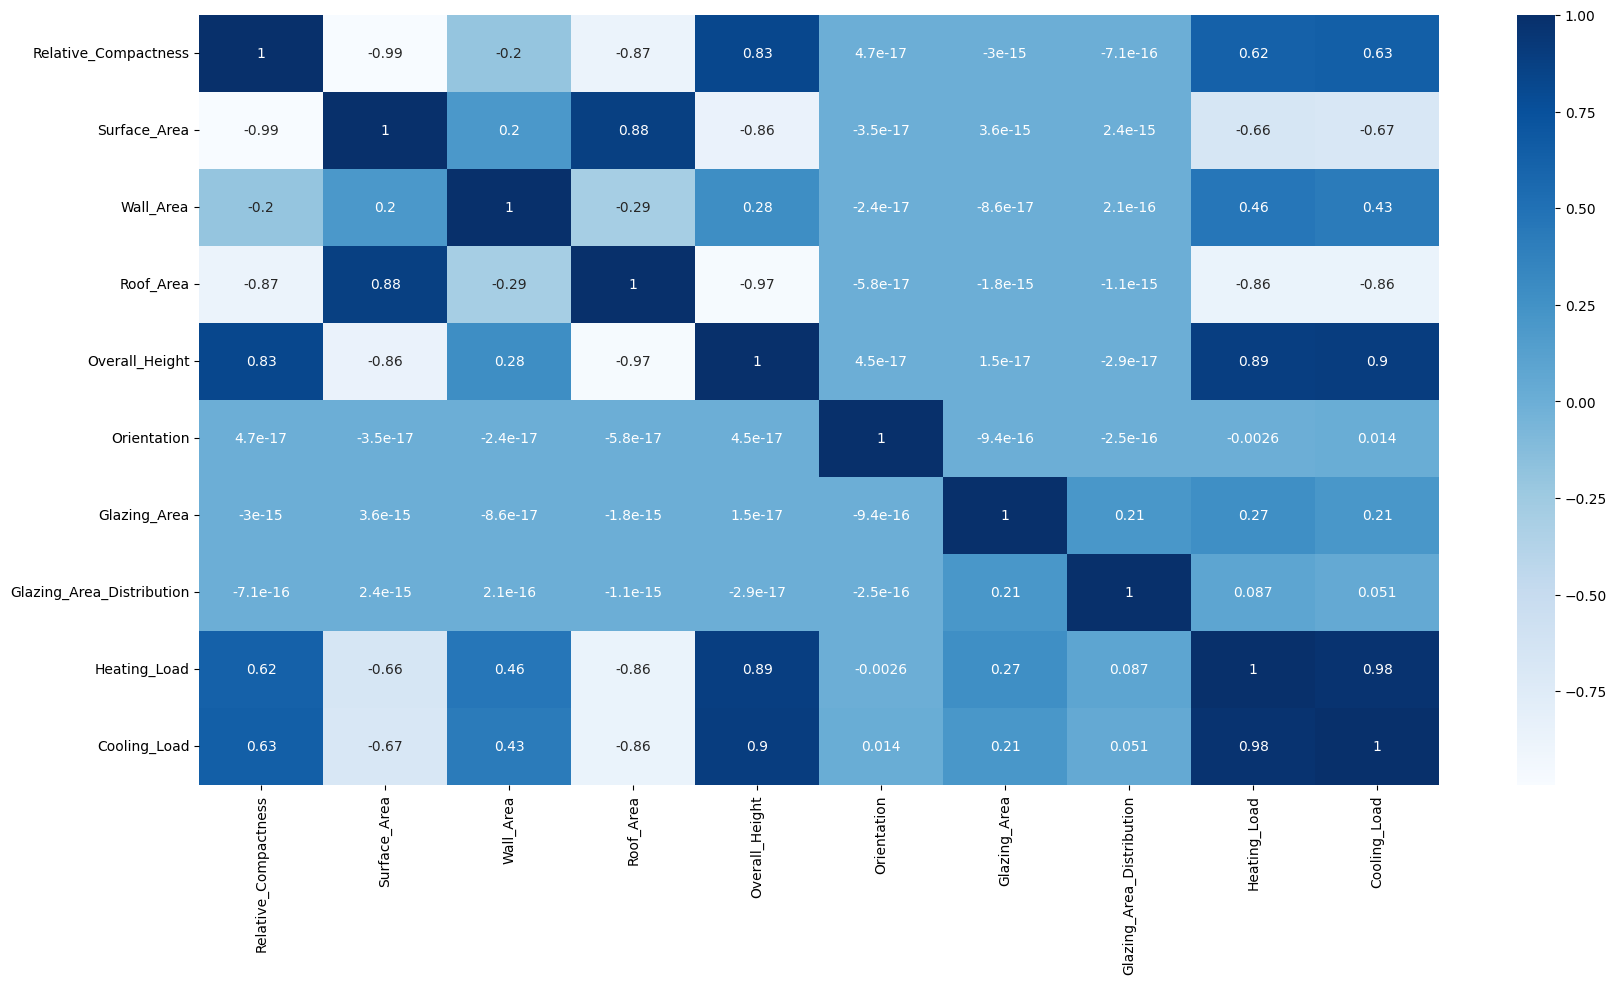

In [112]:
plt.figure(figsize=(20,10))
sns.heatmap(co,annot=True,cmap='Blues')

## Checking for skewness

In [113]:
df.skew()

Relative_Compactness         0.495513
Surface_Area                -0.125131
Wall_Area                    0.533417
Roof_Area                   -0.162764
Overall_Height               0.000000
Orientation                  0.000000
Glazing_Area                -0.060254
Glazing_Area_Distribution   -0.088689
Heating_Load                 0.360449
Cooling_Load                 0.395992
dtype: float64

In [114]:
df.kurt()

Relative_Compactness        -0.706568
Surface_Area                -1.059454
Wall_Area                    0.116593
Roof_Area                   -1.776947
Overall_Height              -2.005229
Orientation                 -1.361042
Glazing_Area                -1.327629
Glazing_Area_Distribution   -1.148709
Heating_Load                -1.245572
Cooling_Load                -1.147190
dtype: float64

## Choosing X and y

In [115]:
# Features
X = df.drop(columns=['Heating_Load', 'Cooling_Load'])

# Target
y = df['Heating_Load']


In [116]:
X

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [117]:
y

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64

# Feature Selection

In [118]:
from sklearn.feature_selection import SelectKBest,f_regression

In [119]:
skb= SelectKBest( score_func= f_regression, k='all')

In [120]:
X_new=skb.fit_transform(X,y)

In [121]:
selected_columns= X.columns[skb.get_support()]
selected_columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution'],
      dtype='object')

In [122]:
X_selected= X[selected_columns]
X_selected

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [123]:
X_selected.to_csv('Featured Data.csv',index=False)

## Scaling

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)
X_scaled

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.34164079,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -0.4472136 ,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ...,  0.4472136 ,
        -1.76044698, -1.81457514],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ..., -0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.34164079,
         1.2440492 ,  1.41133622]], shape=(768, 8))

## Training and testing

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [127]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('Y_train Shape:',y_train.shape)
print('Y_test Shape:',y_test.shape)

X_train Shape: (614, 8)
X_test Shape: (154, 8)
Y_train Shape: (614,)
Y_test Shape: (154,)


In [128]:
y.value_counts()    

Heating_Load
15.16    6
13.00    5
15.23    4
14.60    4
15.55    4
        ..
16.95    1
17.41    1
17.05    1
18.31    1
19.34    1
Name: count, Length: 586, dtype: int64

## Model Building

## DecisionTreeRegressor

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
dtr=DecisionTreeRegressor()

In [131]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [132]:
y_pred_dtr= dtr.predict(X_test)

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [134]:
MAE = mean_absolute_error(y_test,y_pred_dtr)
MSE = mean_squared_error(y_test,y_pred_dtr)
RMSE = np.sqrt(MSE)
R2= r2_score(y_test,y_pred_dtr)

In [135]:
print("\nDecision Tree Regression Evaluation:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)


Decision Tree Regression Evaluation:
MAE: 0.3577272727272726
MSE: 0.324101948051948
RMSE: 0.569299524022239
R2 Score: 0.9964353413925824


## Support Vector Regressor

In [136]:
from sklearn.svm import SVR

In [137]:
svr=SVR()

In [138]:
svr.fit(X_train,y_train)

SVR()

In [139]:
y_pred_svr= svr.predict(X_test)

In [140]:
MAE = mean_absolute_error(y_test,y_pred_svr)
MSE = mean_squared_error(y_test,y_pred_svr)
RMSE = np.sqrt(MSE)
R2= r2_score(y_test,y_pred_svr)

In [141]:
print("\nSupport Vector Regression Evaluation:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)


Support Vector Regression Evaluation:
MAE: 1.640234146573259
MSE: 6.7381928423980675
RMSE: 2.595802928266718
R2 Score: 0.9258895009472637


## Ensemble Learning ---> RandomForestregressor

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rfg=RandomForestRegressor()

In [144]:
rfg.fit(X_train,y_train)

RandomForestRegressor()

In [145]:
y_pred_rfg= rfg.predict(X_test)

In [146]:
MAE = mean_absolute_error(y_test,y_pred_rfg)
MSE = mean_squared_error(y_test,y_pred_rfg)
RMSE = np.sqrt(MSE)
R2= r2_score(y_test,y_pred_rfg)

In [147]:
print("\nRandom forest Regression Evaluation:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)


Random forest Regression Evaluation:
MAE: 0.34405389610389525
MSE: 0.29627127759740196
RMSE: 0.544308072324306
R2 Score: 0.9967414390250783


## GradientBoostingRegressor 

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [149]:
gbr=GradientBoostingRegressor()

In [150]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [151]:
y_pred_gbr= gbr.predict(X_test)

In [152]:
MAE = mean_absolute_error(y_test,y_pred_gbr)
MSE = mean_squared_error(y_test,y_pred_gbr)
RMSE = np.sqrt(MSE)
R2= r2_score(y_test,y_pred_gbr)

In [153]:
print("\nGradient Boosting Regression Evaluation:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)


Gradient Boosting Regression Evaluation:
MAE: 0.3598439831213884
MSE: 0.2847859249287058
RMSE: 0.5336533752621694
R2 Score: 0.9968677615032238


In [154]:
from sklearn.ensemble import AdaBoostRegressor

In [155]:
#Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "AdaBoost": AdaBoostRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}


In [156]:
#Store results
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(metrics)
print(results_df)

     


               Model   MAE   MSE  RMSE  R² Score
0  Linear Regression  2.06  8.78  2.96    0.9035
1      Decision Tree  0.36  0.32  0.57    0.9964
2      Random Forest  0.34  0.30  0.55    0.9967
3           AdaBoost  1.47  3.25  1.80    0.9643
4  Gradient Boosting  0.36  0.28  0.53    0.9969


## Best Performing Model: Gradient Boosting Regressor
It achieved the lowest error across MSE and RMSE and the highest R² score (0.9969), indicating almost perfect fit with the data.

## Creating a pipeline

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [172]:
# Pipeline with scaling + model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

# Parameter grid to search
param_grid = {
    'gbr__n_estimators': [100, 200],
    'gbr__learning_rate': [0.05, 0.1, 0.2],
    'gbr__max_depth': [3, 4, 5],
    'gbr__subsample': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Best params
print("✅ Best Parameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters:
{'gbr__learning_rate': 0.05, 'gbr__max_depth': 5, 'gbr__n_estimators': 200, 'gbr__subsample': 1.0}


In [168]:
# Get best model from search
best_model = grid_search.best_estimator_

# Train-test split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")



📊 Evaluation Metrics:
MAE       : 0.33
MSE       : 0.20
RMSE      : 0.45
R² Score  : 0.9981


In [161]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr', GradientBoostingRegressor(random_state=42))])

## Saving

In [162]:
joblib.dump(pipeline,'Energy.joblib')

['Energy.joblib']

In [163]:
loaded_pipeline=joblib.load('Energy.joblib')

## Predicting unseen data

In [164]:
# Create a single unseen sample with correct feature order
unseen_data = pd.DataFrame([{
    'Relative_Compactness': 0.85,
    'Surface_Area': 600.0,
    'Wall_Area': 300.0,
    'Roof_Area': 200.0,
    'Overall_Height': 3.5,
    'Orientation': 2,                    # Categorical (0–4)
    'Glazing_Area': 0.25,
    'Glazing_Area_Distribution': 2      # Categorical (0–5)
}])

# Predict Heating Load
predicted_heating_load = pipeline.predict(unseen_data)
print(f"🔥 Predicted Heating Load: {predicted_heating_load[0]:.2f}")


🔥 Predicted Heating Load: 19.93
